For logistic with AUC only

In [7]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [8]:
Model = "logistic"
TrainPattern = "parallel"

# Setting Number 1, 2, or 3
Index = 2
batchsize = 32
# number of transmission iterations
kNum = 50
# number of iterations
niter = 100

# number of local updates
QList = [5, 10, 25]
# factor of the proximal term
muList = [0, 0.1]

In [9]:
n = 2000
sig = 0.1
randomBeta = "True"
Xdist= "uniform"


In [10]:
# number of eta0 values
numEta0s = 20 
minval = 10**(-2)
maxval = 5

# AUC or ll
statType = "AUC"

In [11]:

eta0List = math.e**(np.linspace(math.log(minval), math.log(maxval), num=numEta0s))

def FindBestSetting(eta0List, mu, Index, sig, Q, statType):
    values_array = []
    for eta0 in eta0List:
        fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
        infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
        new_dict = pickle.load(infile)
        infile.close()
        value=new_dict[statType]
        LastValueMean = np.mean(value[:, (value.shape[1]-1)])
        values_array.append(LastValueMean)
    return max(values_array), values_array.index(max(values_array))

In [12]:
#FBCD
# collect the results without the proximal term 
mu = 0

BestVal1 = []
IndList1 = []
for Q in QList:
    Bv, ind = FindBestSetting(eta0List, mu, Index, sig, Q, statType)
    BestVal1.append(Bv)
    IndList1.append(ind)

# collect the results with the proximal term
mu = 0.1

BestVal2 = []
IndList2 = []
for Q in QList:
    Bv, ind = FindBestSetting(eta0List, mu, Index, sig, Q, statType)
    BestVal2.append(Bv)
    IndList2.append(ind)

FileNotFoundError: [Errno 2] No such file or directory: './VFL/normal_results/Setting2/data/normal_Setting_2_n_300_sig_0.1_Xdist_uniform_randomBeta_True_batchsize_32_TrainPattern_parallel_mu_0_Q_5_eta0_0.010000000000000007_dic.p'

In [ ]:
if max(BestVal1) > max(BestVal2):
    bestMuInd = 0
    bestQ = QList[BestVal1.index(max(BestVal1))]
    bestEta0 = eta0List[IndList1[BestVal1.index(max(BestVal1))]]
    bestVal = max(BestVal1)
elif max(BestVal1) < max(BestVal2):
    bestMuInd = 1
    bestQ = QList[BestVal2.index(max(BestVal2))]
    bestEta0 = eta0List[IndList2[BestVal2.index(max(BestVal2))]]
    bestVal = max(BestVal2)
print("bestVal=" + str(bestVal) + ", mu=" + str(muList[bestMuInd]) + ", Q=" +str(bestQ) + ", eta0 =" + str(bestEta0)) 

bestVal=0.7954230922751157, mu=0.1, Q=25, eta0 =0.2633361783471869


In [ ]:
# for FSGD

Bv, ind = FindBestSetting(eta0List, 0, Index, sig, 1, statType)
eta0FSGD = eta0List[ind]
print("bestVal=" + str(Bv) + ", eta0=" + str(eta0FSGD))

bestVal=0.7920513883219265, eta0=3.6051135770910494


In [ ]:
nrep = niter + 1

In [ ]:
# read the FedBCD data 
mu = muList[bestMuInd]
eta0 = bestEta0
Q = bestQ
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
FedBCD_AUC=new_dict[statType]

In [ ]:
# read the FedSGD data (mu = 0, Q=1)
mu = 0
eta0 = eta0FSGD
Q = 1
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
FedSGD_AUC=new_dict[statType]

In [ ]:
# read the assisted learning data
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta
infile = open("./AE_AL/" + Model + "_results/results/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
AEAL_AUC = new_dict[statType]
oracle_AUC = new_dict["AUC_oracle"]

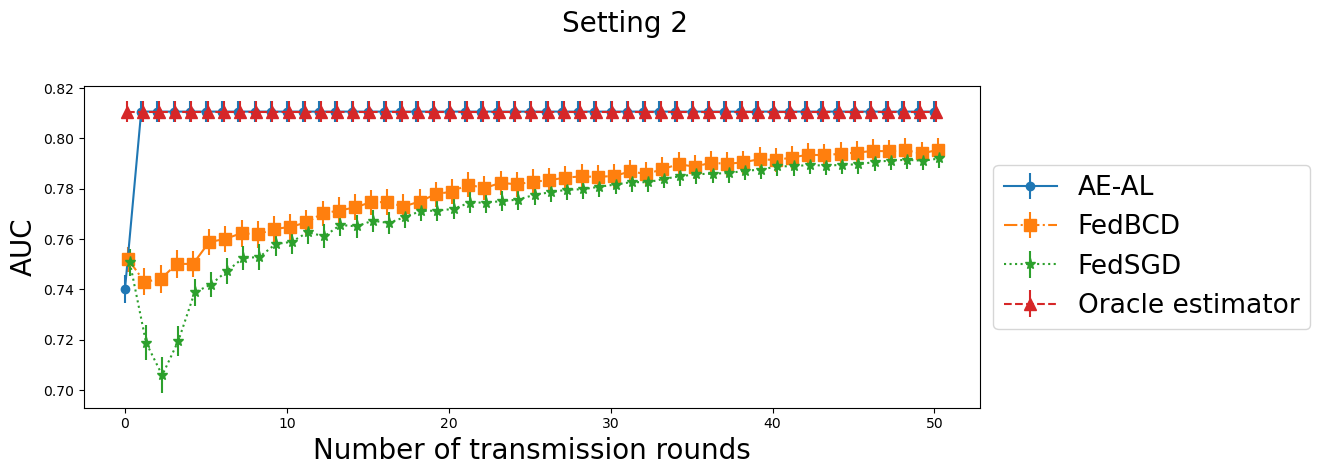

In [ ]:
# number of plots
NumPlots = 1
niterList = np.array(range(kNum + 1))
#==========================Setting 1================================
fit, axes = plt.subplots(1,1, figsize = (9, 8))
fit.set_size_inches(14, 5)   
#fit.suptitle( 'Setting ' + str(Index) + ', AR(1) ' + r'$\rho=' + str(sig) + '$', fontsize=20)  
fit.suptitle( 'Setting ' + str(Index), fontsize=20) 
#nList = ['n=300', 'n=2000']
for i in range(NumPlots):
    #axe = axes[i]
    if NumPlots == 1:
        axe = axes
    else:
        axe = axes[i]
    AEAL_AUC_mean = np.mean(AEAL_AUC, axis = 0)
    AEAL_AUC_ste = np.std(AEAL_AUC, axis = 0)/math.sqrt(nrep)
    #AEAL_AUC_ste = np.std(AEAL_AUC, axis = 0)

    
    oracle_AUC_mean = np.repeat(np.mean(oracle_AUC), (kNum + 1) )
    oracle_AUC_ste = np.repeat(np.std(oracle_AUC), (kNum + 1) )/math.sqrt(nrep)
    #oracle_AUC_ste = np.repeat(np.std(oracle_AUC), (kNum + 1) )

    FedBCD_AUC_mean = np.mean(FedBCD_AUC, axis = 0)
    FedBCD_AUC_ste = np.std(FedBCD_AUC, axis = 0)/math.sqrt(nrep)
    #FedBCD_AUC_ste = np.std(FedBCD_AUC, axis = 0)

    FedSGD_AUC_mean = np.mean(FedSGD_AUC, axis = 0)
    FedSGD_AUC_ste = np.std(FedSGD_AUC, axis = 0)/math.sqrt(nrep)
    #FedSGD_AUC_ste = np.std(FedSGD_AUC, axis = 0)
    
    
    axe.errorbar((niterList), AEAL_AUC_mean , AEAL_AUC_ste, marker = 'o')
    axe.errorbar((niterList + 0.2), FedBCD_AUC_mean , FedBCD_AUC_ste, marker = "s", linestyle = '-.', markersize=8)
    axe.errorbar((niterList + 0.3),  FedSGD_AUC_mean , FedSGD_AUC_ste, marker = "*", linestyle = 'dotted', markersize=8)
    axe.errorbar((niterList + 0.1), oracle_AUC_mean , oracle_AUC_ste, marker = "^", linestyle = '--', markersize=8)

    axe.set_xlabel("Number of transmission rounds", fontsize=20)
    if statType == "AUC":
        axe.set_ylabel("AUC", fontsize=20)
    elif statType == "ll":
        axe.set_ylabel("Log-likelihood", fontsize=20)
    #axe.set_title(nList[i], fontsize=20)
    
    if i==(NumPlots - 1):
        axe.legend(['AE-AL', 'FedBCD', 'FedSGD', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
    elif i<(NumPlots - 1):
        axe.legend('',frameon=False)
plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])

#===========================create folder to store output results=====================
results_path_data = "./Result_Figure" + Model
# Check whether the specified path exists or not
isExist = os.path.exists(results_path_data)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(results_path_data)


fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta

plt.savefig('Result_Figure/' + Model+'/' + fname + 'Setting1.pdf')